# This notebook is created to practice common used hypothesis test technique

1. Z-test
2. T-test
3. Wilcoxon signed rank test.
3. Rank-Sum test
4. Permutation test
5. F-test
6. Chi-square test
7. Pearson Chi-square test for goodness of fit

## 1. Z-test
Z-test is used when test statistics follows a standard normal distribution $N(0, 1)$ or can be appriximated by $N(0, 1)$ at large sample size asymptotes ($n\to \infty$) under central limit theorem (CLT).

Example 1.1. (a one-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is known.

Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $T>Z(\alpha)$

Example 1.2. (a two-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1\neq\mu_0, \sigma)$, where $\sigma$ is known.

In this case, while the alternative hypothesis is not fully specified because we don't know what $\mu_1$ is, the null hypothesis is fully specified because we know both $\mu_0$ and $\sigma$. Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $|T|>Z(\alpha/2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

### Example. One sample two-tail Z test.

Test statistics T:  3.90252 and P-vale 0.00009520
Observed mean:  0.78050, 95% Confidence Interval for keeping H0: [-0.39199 ,  0.39199]


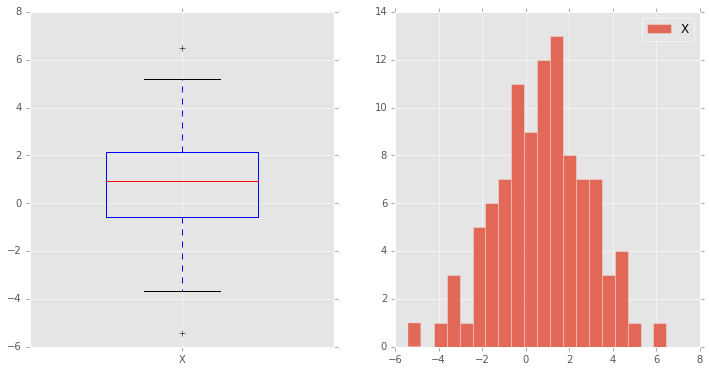

In [12]:
plt.style.use('ggplot')

def plot_dignostics_twosample(X0, X1, labels=['X0','X1']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X0,X1], positions=[0, 1],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X0,alpha=0.8)
    plt.hist(X1,alpha=0.8)
    plt.legend(labels)

def plot_dignostics_onesample(X, labels=['X'],bins=20):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X,alpha=0.8, bins=bins)
    plt.legend(labels)

def zscore(alpha):
    return scipy.stats.norm.ppf(1-alpha)

def p_value(T):
    return (1-scipy.stats.norm.cdf(abs(T)))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
X = X1 
plot_dignostics_onesample(X)
se = sigma/np.sqrt(N)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))

### Example. Two samples two-tail Z test.

Test statistics T: -6.55187 and P-vale 0.00000000
Observed difference in mean: -1.06992, 95% Confidence Interval for keeping H0: [-0.32006 ,  0.32006]


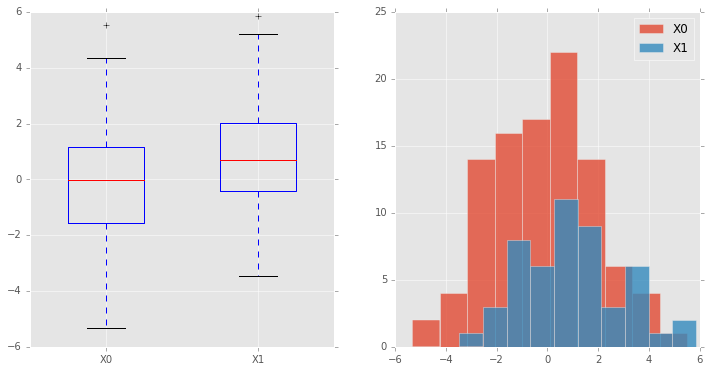

In [108]:
# Example. Two sample two-tail Z test
N1     = 100  # sample size
N2     = 50  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N1) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N2) # sample that follows alternative hypothesis.

#Two sample two-tail Z test.
# calculate z-score
# testing H1
plot_dignostics_twosample(X0,X1)
se = sigma/np.sqrt(N1 + N2)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X0) - np.mean(X1))/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed difference in mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X0)-np.mean(X1), -m*se, m*se))

## 2. T test

$t$-test is used when test statistics follows a student $t$-distribution. This arises when testing distribution mean when distribution variance is unknown and has to be estimated from the sample. Each sample point is assumed to follow iid normal distribution. $t$-distribution converges to normal distribution when sample size is large.

Example 2.1. (a one sample (or paired) one-sided T-test, equal variance): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is unknown.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is unknown.

Unbiased estimate of $\sigma$ from sample $S$: 

$S^2=\frac{1}{n-1}\sum_{i}^{n} (X_i - \bar{X})^2$

There's a theorem (state without proof here) says $(n-1)S^2/\sigma^2 \sim \chi_{n-1}^2$

Using test statistics $T = \frac{\sqrt{n}(\bar{X}-\mu_0)}{S}$ follows a student $t$ distribution with degree of freedom $n-1$. This is because, the test statistics $T$ is indeed: 

$T = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{S/\sigma} = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{\sqrt{S^2/\sigma^2}}= \frac{N(0,1)}{\sqrt{\chi_{n-1}^{2}/(n-1)}}$

We know student t-distribution with $n$ degree of freedom is defined as $\frac{N(0,1)}{\sqrt{\chi_{n}^{2}/(n)}}$


Similarly, for two-sample ($X_n$ and $Y_m$) $t$-test with equal variance, the test statistics
$T = \frac{(\bar{X}-\bar{Y})}{S_p \sqrt{\frac{1}{n}+\frac{1}{m}}}$, where $S_p$ is the unbiased pooled standard error:

$S_p^2 = \frac{1}{m+n-2} \left(\sum_{i=1}^{n}(X_i-\bar{X})^2 + \sum_{j=1}^{m} (Y_j-\bar{Y})^2 \right)$

In this case, $\mu_0$, $\mu_1$, and $\sigma$ are all unknown.
This test also exploit the fact that $S_p^2$ follows a $\chi_{m+n-1}^2$


Test statistics T:  0.65192 and P-vale 0.51596349
Observed mean:  1.29779, 95% Confidence Interval for keeping H0: [-3.95002 ,  3.95002]


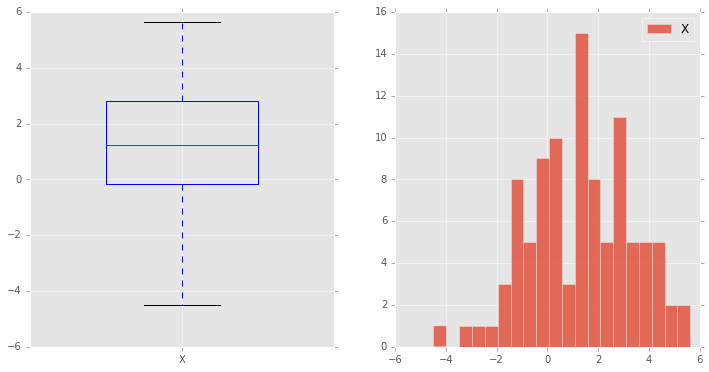

In [34]:
# One sample (paired) two tailed t-test

def tscore(alpha, df):
    return scipy.stats.t.ppf(1-alpha, df)

def p_value(T, df):
    return (1-scipy.stats.t.cdf(abs(T), df))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
df = N - 1
X = X1
plot_dignostics_onesample(X)
se = np.std(X, ddof=1)   # unbiased standard error, estimated from sample.
m = tscore(alpha/2, df)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T, df)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))

## 3. Wilcoxon signed rank test

Wilcoxon signed rank test is used in the following setting. Let's say we have one $n$-iid sample $X_1, X_2, ..., X_n \sim f$, where the __normality assumption is dropped!__ We have the following null and alternative hypothesis:<br>
$H_0$: $f$ is symmetric about 0<br>
$H_1$: $f$ is symmetric about $\mu$ for some $\mu>0$<br>
Because the shape of $f$ is arbitrary under $H_0$, the distribution of the $t$-statistic is no longer the same under every data distribution $P\in H_0$—in particular, __it can be very far from $t_{n-1}$ if $n$ is moderately small and $f$ is heavy-tailed__. We consider instead the __signed rank statistic__ $W_{+}$ defined in the following way:
1. Sort $|X_1|,|X_2|,..., |X_n|$ in increasing order. Assigne the smallest value (closest to zero) a rank of 1, the next smallest value a rank of 2, etc., and the largest value of a rank $n$
2. Define $W_{+}$ as the sum of the ranks corresponding to only the positive values of the $X_1, X_2, ..., X_n$.

As an example, suppose we have four observations $X_1=2, X_2=-4, X_3=-1, X_4=10$. Then the ranks of these four observations would be $2,3,1,4$. Observations $X_1$ and $X_4$ are positive, so $W_{+}=2+4=6$. We expect $W_{+}$ to be large under $H_{1}$ than under $H_0$ because high-rank observations are more likely to be positive under $H_1$. The test that rejects for large $W_{+}$ is called __Wilcoxon's signed rank test__. The following theorem states that $W_{+}$ has the same distribution under every $P \in H_0$, and provides a method for determining the null distribution and rejection threshold for $W_{+}$ when $n$ is large. (When $n$ is small, we can determine the exact null distribution of $W_{+}$ by computing $W_{+}$ for all $2^n$ possible combinations of $+$ and $-$ signs for the ranked data.)

__Theorem__ (Proof omitted here): _The distribution of $W_{+}$ is the same for every $PDF~f$ that is symmetric about 0. For large n, this distribution is approximately $N(\frac{n(n+1)}{4}, \frac{n(n+1)(2n+1)}{24})$. (More formally, $\sqrt{\frac{24}{n(n+1)(2n+1)}}(W_{+}-\frac{n(n+1)}{4})\to N(0, 1)$) in distribution as $n \to \infty$.

This test is powerful when the underlying distribution is not normal, where $t$-test can fail. The test essentially makes use of the symmetry that exists under null hypothesis. In this case, no matter what distribution $f$ is, the signs of $\pm X_1, \pm X_2, ..., \pm X_n$ given $|X_1|, |X_2|, ..., |X_n|$ are equally likely. Therefore, we can also use computer simulation to approximate the distribution $W_{+}$ even when n is large.

If normal distribution of $W_{+}$ is assumed, the sample size should be sufficiently large (ususally more than 20).

## 3.1 Example

Test the symmetry of distribution centered at zero when sample is generated from a cauchy distribution.
In this case, extreme values are much more likely to appear in the sample than the case where the unknown distribution is normal. The heavy tail of cauchy distribution makes both $t$-test and $z$-test fail. In fact, cauchy distribution doesn't have defined variance, which means the sample variance cannot accurately capture the spead-out of the distribution. However, in this case, Wilcoxon signed rank test is robust.

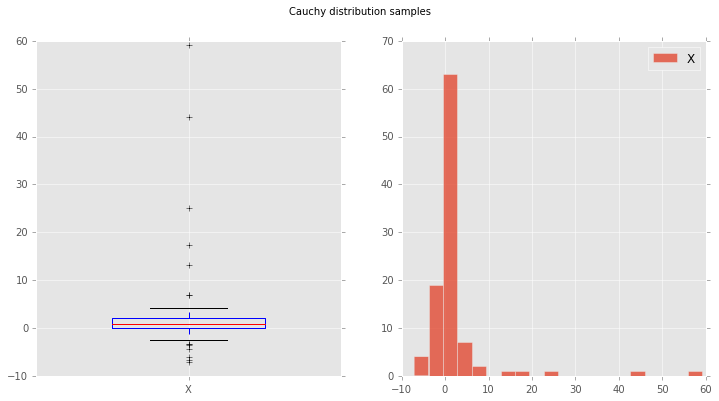

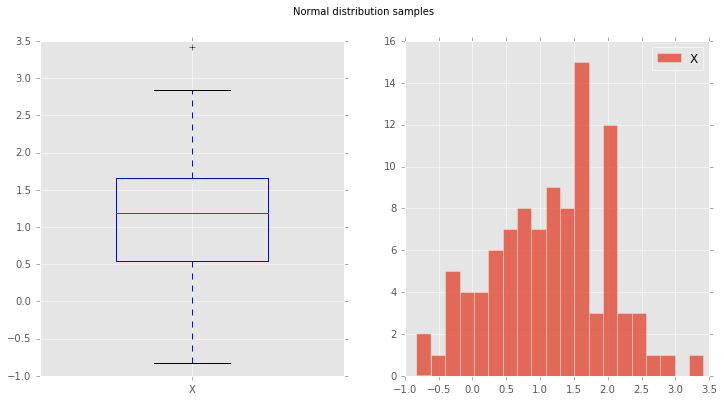

In [41]:
N     = 100
mu    = 1
sigma = 1

# generate samples from a cauchy distribution
X     = scipy.stats.cauchy.rvs(loc = mu, scale = sigma, size=N)
plot_dignostics_onesample(X,bins=20)
plt.suptitle('Cauchy distribution samples')

# generate samples from a normal distribution
Xn     = scipy.stats.norm.rvs(loc = mu, scale = sigma, size=N)
plot_dignostics_onesample(Xn,bins=20)
plt.suptitle('Normal distribution samples')

### Let's first carry out the t-test

Test statistics T:  0.25873 and P-vale 0.79637775
Observed mean:  2.12200, 95% Confidence Interval for keeping H0: [-16.27352 , 16.27352]
Fail to reject Null hypothesis at 95% confidence


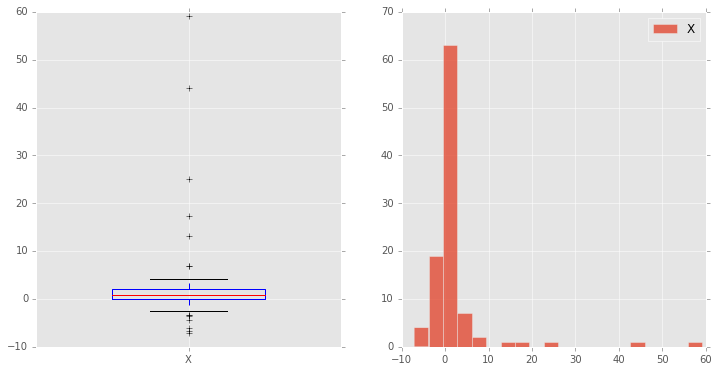

In [43]:
df = N - 1
plot_dignostics_onesample(X)
se = np.std(X, ddof=1)   # unbiased standard error, estimated from sample.
m = tscore(alpha/2, df)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T, df)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))
if p_value(T, df)<0.05 and np.abs(np.mean(X)-mu0)>m*se:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')

We can see the heavy tail of sample prevented $t$-test to reject the null when the true distribution is centered at 1 instead of 0 in this case.

### Now let's perform a Wilcoxon sign rank test.

In [45]:
# T: W_{+} test statistics.
T, pvalue = scipy.stats.wilcoxon(X, zero_method='wilcox', correction=False)
print('Test statistics T: %8.5f and P-vale %10.8f' % (T, pvalue))
if pvalue<0.05:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')

Test statistics T: 1417.00000 and P-vale 0.00013916
Reject null hypothesis at 95% confidence


We can see Wilcoxon sign rank test __successfully rejects__ the null hypothesis. One thing to note is that while wilcoxon sign rank test did help us to reject the null hypothesis, it doesn't tell us where the true center is.

### Wilcoxon sign rank test by simulations

In addition to use asymptotic normal distribution of $W_{+}$, we can directly simulate the distribution of $W_{+}$.

In [65]:
M = 10000  # number of samples in the simulation.
# we sort absolute value of 
X_abs = np.sort(abs(X))
Ts    = np.zeros((M, ))
for i in range(M):
    # randome generate the sign of the sample.
    rand_sign = np.sign(np.random.rand(N)-0.5)
    Ts[i], _= scipy.stats.wilcoxon(X_abs*rand_sign, zero_method='wilcox', correction=False)
    if (i+1)%round(M/10)==0:
        print('%%%3d finished'%((i+1)/round(M/10)*10))

% 10 finished
% 20 finished
% 30 finished
% 40 finished
% 50 finished
% 60 finished
% 70 finished
% 80 finished
% 90 finished
%100 finished


Test statistics T:  1417 and P-vale  0.00010
Reject null hypothesis at 95% confidence


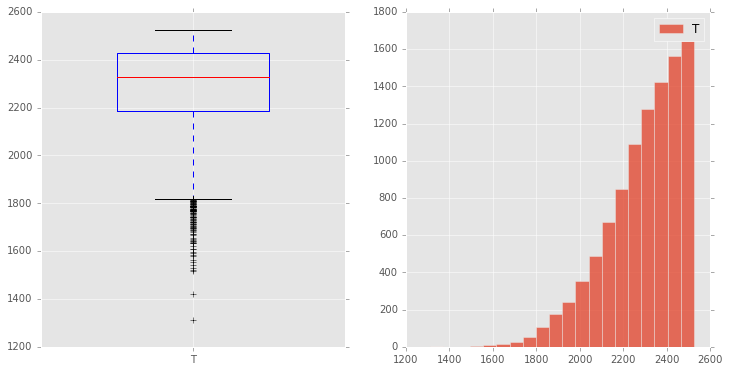

In [71]:
plot_dignostics_onesample(Ts,labels=['T'])
pvalue = np.mean(Ts<T)
print('Test statistics T: %5d and P-vale %8.5f' % (T, pvalue))
if pvalue<0.05:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')